# Analysis
This code contains all of the the analysis for data precessing and graphing of the three primary figures detailed below.

## Importing Libraries

In [3]:
import json
import pandas as pd
import copy
import matplotlib.pyplot as plt

## Data Preprocessing
Prior to graphing, we first load the JSON files and convert them into easy-to-use pandas dataframes

In [4]:
### Reading in the article titles ###
input_data = pd.read_csv("../data_raw/rare-disease_cleaned.AUG.2024.csv")

# Extract the disease names
disease_names = input_data['disease']

#Write the outputs to the three JSON files
with open('../data_clean/rare-disease_monthly_mobile_201507_202409.json', 'r') as file:
    mobile_all_views = json.load(file)

with open('../data_clean/rare-disease_monthly_desktop_201507_202409.json', 'r') as file:
    desktop_all_views = json.load(file)

with open('../data_clean/rare-disease_monthly_combined_201507_202409.json', 'r') as file:
    combined_all_views = json.load(file)

#Converting the jsons into an easier to use dataframe
for disease in disease_names:
    if disease == 'Klinefelter syndrome':
        mobile_all_views_df = pd.DataFrame(mobile_all_views[disease])
        desktop_all_views_df = pd.DataFrame(desktop_all_views[disease])
        combined_all_views_df = pd.DataFrame(combined_all_views[disease])
    else:
        mobile_all_views_df = pd.concat([mobile_all_views_df, pd.DataFrame(mobile_all_views[disease])], ignore_index = True)
        desktop_all_views_df = pd.concat([desktop_all_views_df, pd.DataFrame(desktop_all_views[disease])], ignore_index = True)
        combined_all_views_df = pd.concat([combined_all_views_df, pd.DataFrame(combined_all_views[disease])], ignore_index = True)

## Figure 1 - Maximum Average and Minimum Average
Figure 1 contains time series for the articles that have the highest average page requests and the lowest average page requests for desktop and mobile access over the entire timeseries. The code cell below starts by filtering the data to determine the min and max average articles, and then filters the data into easy-to-graph format before plotting the data, and storing the output figure to a .png located in the "results" folder.

Disease with lowest average views per month on mobile:  views    Filippi_Syndrome
dtype: object
Disease with highest average views per month on mobile:  views    Black_Death
dtype: object
Disease with lowest average views per month on desktop:  views    Filippi_Syndrome
dtype: object
Disease with highest average views per month on desktop:  views    Black_Death
dtype: object


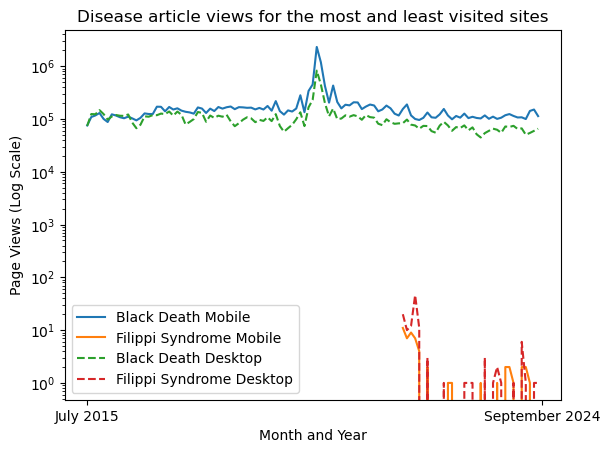

In [5]:
# Determine which disease has the most and least average views
min_views_mobile = mobile_all_views_df.groupby('article').mean('views').idxmin()
max_views_mobile = mobile_all_views_df.groupby('article').mean('views').idxmax()
min_views_desktop = desktop_all_views_df.groupby('article').mean('views').idxmin()
max_views_desktop = desktop_all_views_df.groupby('article').mean('views').idxmax()

print('Disease with lowest average views per month on mobile: ', min_views_mobile)
print('Disease with highest average views per month on mobile: ', max_views_mobile)
print('Disease with lowest average views per month on desktop: ', min_views_desktop)
print('Disease with highest average views per month on desktop: ', max_views_desktop)

# Create a copy of the data, and filter / pivot to improve ease of plotting
mobile_df_fig1_copy = copy.deepcopy(mobile_all_views_df)
desktop_df_fig1_copy = copy.deepcopy(desktop_all_views_df)

mobile_df_fig1_copy = mobile_df_fig1_copy[mobile_df_fig1_copy['article'].isin(['Filippi_Syndrome', 'Black_Death'])]
mobile_df_fig1_copy = mobile_df_fig1_copy.pivot(index='timestamp', columns='article', values='views')

desktop_df_fig1_copy = desktop_df_fig1_copy[desktop_df_fig1_copy['article'].isin(['Filippi_Syndrome', 'Black_Death'])]
desktop_df_fig1_copy = desktop_df_fig1_copy.pivot(index='timestamp', columns='article', values='views')

# Graph the figure
plt.plot(mobile_df_fig1_copy['Black_Death'], label='Black Death Mobile')
plt.plot(mobile_df_fig1_copy['Filippi_Syndrome'], label='Filippi Syndrome Mobile')
plt.plot(desktop_df_fig1_copy['Black_Death'], label='Black Death Desktop', linestyle='--')
plt.plot(desktop_df_fig1_copy['Filippi_Syndrome'], label='Filippi Syndrome Desktop', linestyle='--')
plt.title('Disease article views for the most and least visited sites')
plt.xticks([])
plt.xticks( [0, len(mobile_df_fig1_copy)], labels = ['July 2015', 'September 2024'])
plt.xlabel('Month and Year')
plt.ylabel('Page Views (Log Scale)')
plt.yscale('log')
plt.legend()
plt.savefig('../results/figure1.png', format='png')

# Figure 2 - Top 10 Peak Page Views
Figure 2 contains time series for the top 10 article pages by largest (peak) page views over the entire time series by access type. The code cell below starts by filtering the data to determine the top 10 peak view articles for desktop and mobile, and then filters the data into easy-to-graph format before plotting the data, and storing the output figure to a .png located in the "results" folder.

Mobile highest peak views:                             views
article                          
Black_Death               2313741
Pandemic                  2276916
Pfeiffer_syndrome          777886
Chloroquine                777537
Stiff-person_syndrome      677927
Porphyria                  585872
Glioblastoma               562173
Cleidocranial_dysostosis   485195
Botulism                   470273
Kawasaki_disease           448512

Desktop highest peak views:                                          views
article                                       
Pandemic                               1046521
Black_Death                             823649
Chloroquine                             440897
Pfeiffer_syndrome                       408153
Fibrodysplasia_ossificans_progressiva   313785
Botulism                                302593
Robert_Koch                             254656
Smallpox                                249177
Cleidocranial_dysostosis                191115
Amyotrophic_lateral

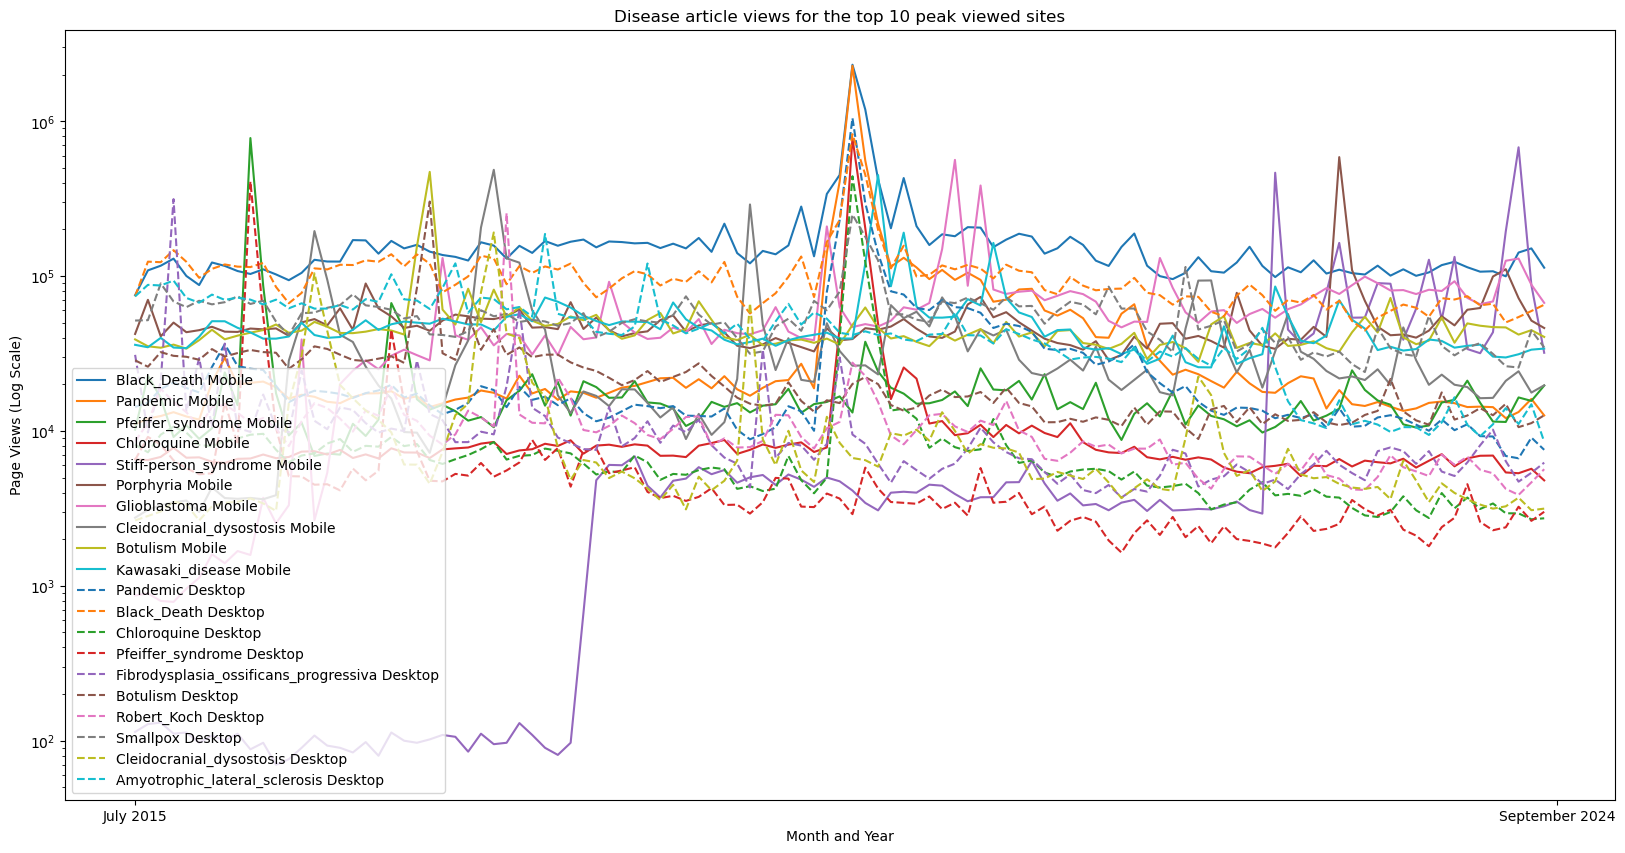

In [6]:
#Determine which articles have the top 10 peak views
mobile_peak_articles = mobile_all_views_df.groupby('article').max('views').sort_values(by='views', ascending = False).head(10).index.tolist()
desktop_peak_articles = desktop_all_views_df.groupby('article').max('views').sort_values(by='views', ascending = False).head(10).index.tolist()
print('Mobile highest peak views:', mobile_all_views_df.groupby('article').max('views').sort_values(by='views', ascending = False).head(10))
print('\nDesktop highest peak views:', desktop_all_views_df.groupby('article').max('views').sort_values(by='views', ascending = False).head(10))

# Create a copy of the data, and filter / pivot to improve ease of plotting
mobile_df_fig2_copy = copy.deepcopy(mobile_all_views_df)
desktop_df_fig2_copy = copy.deepcopy(desktop_all_views_df)

mobile_df_fig2_copy = mobile_df_fig2_copy[mobile_df_fig2_copy['article'].isin(mobile_peak_articles)]
mobile_df_fig2_copy = mobile_df_fig2_copy.pivot(index='timestamp', columns='article', values='views')

desktop_df_fig2_copy = desktop_df_fig2_copy[desktop_df_fig2_copy['article'].isin(desktop_peak_articles)]
desktop_df_fig2_copy = desktop_df_fig2_copy.pivot(index='timestamp', columns='article', values='views')

# Graph the figure
plt.figure(figsize=(20, 10))

for disease in mobile_peak_articles:
    plt.plot(mobile_df_fig2_copy[disease], label=f'{disease} Mobile')

for disease in desktop_peak_articles:
    plt.plot(desktop_df_fig2_copy[disease], label=f'{disease} Desktop', linestyle='--')

plt.title('Disease article views for the top 10 peak viewed sites')
plt.xticks([])
plt.xticks( [0, len(mobile_df_fig1_copy)], labels = ['July 2015', 'September 2024'])
plt.xlabel('Month and Year')
plt.ylabel('Page Views (Log Scale)')
plt.yscale('log')
plt.legend()
plt.savefig('../results/figure2.png', format='png')

# Figure 3 - Fewest Months of Data
Figure 3 shows the the top 10 pages for both access types with the fewest months of available data. The code cell below starts by filtering the data to determine which articles have the fewest months of data, and then filters the data into easy-to-graph format before plotting the data, and storing the output figure to a .png located in the "results" folder. Note that the x-axis is on a different scale than the previous two figures.

Articles with the least months of data (mobile):                                                 article  Count
1399  Retinal_vasculopathy_with_cerebral_leukoenceph...     33
591                                    Filippi_Syndrome     34
240       COVID-19_vaccine_misinformation_and_hesitancy     37
235                           CDKL5_deficiency_disorder     40
856                                       Joseph_Vinetz     40
1525  Spongy_degeneration_of_the_central_nervous_system     41
740                                  Hemolytic_jaundice     41
213                                        Bradley_Monk     41
426                                           Deaf_plus     41
1420                                 Ring_chromosome_22     44

Articles with the least months of data (desktop):                                                 article  Count
1399  Retinal_vasculopathy_with_cerebral_leukoenceph...     33
591                                    Filippi_Syndrome     34
240       COVID-19

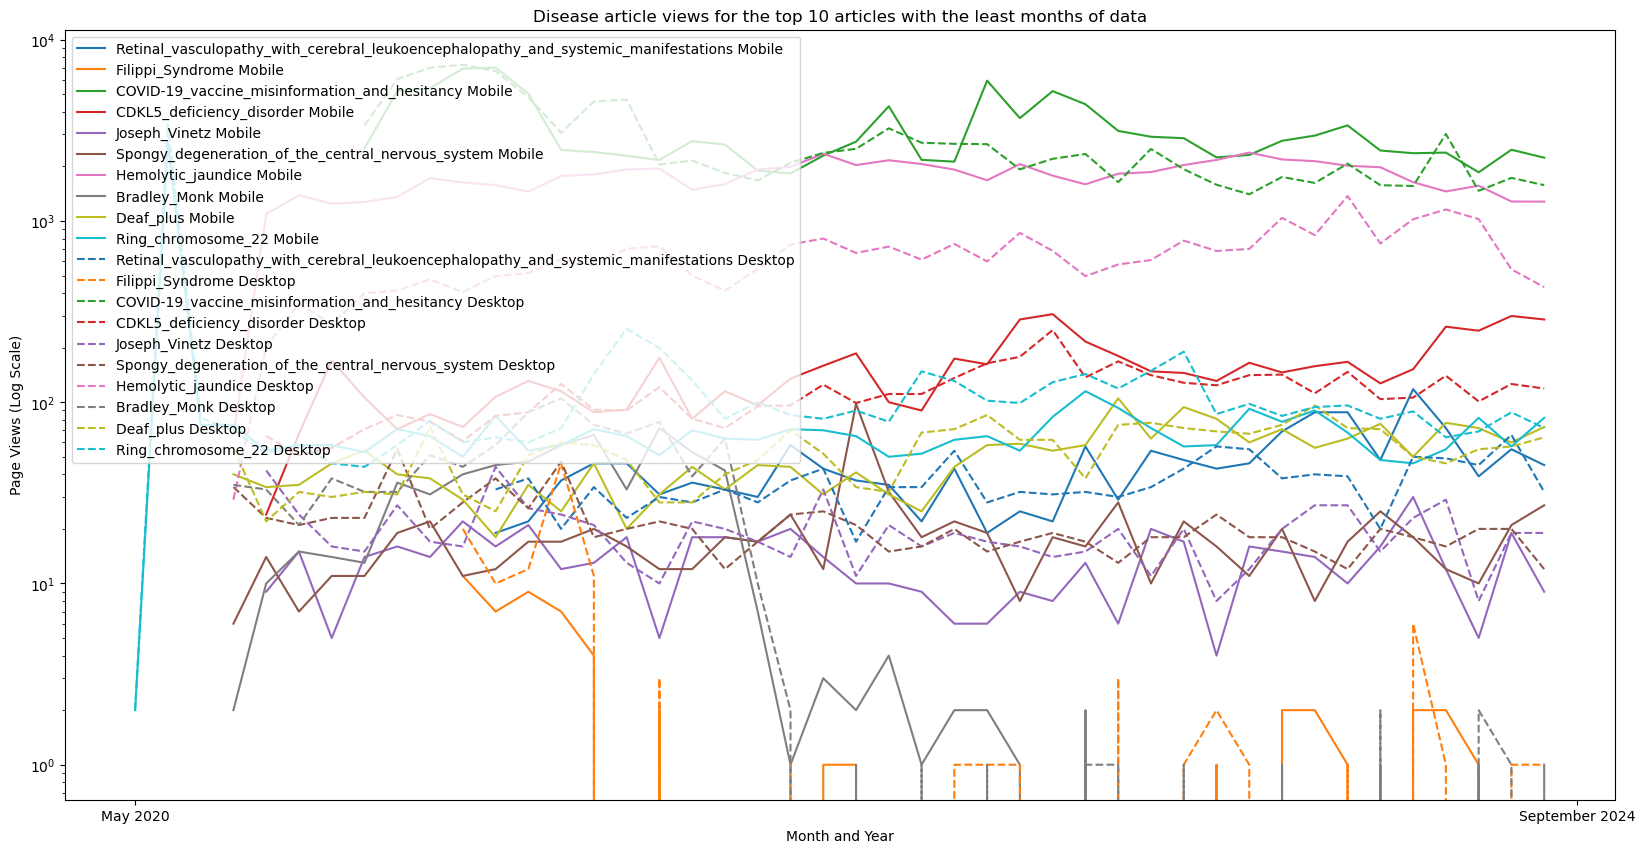

In [7]:
#Determine which articles have the fewest months of data
mobile_least_months_articles = mobile_all_views_df.groupby('article').size().reset_index(name='Count').sort_values(by='Count').head(10)['article'].to_list()
desktop_least_months_articles = desktop_all_views_df.groupby('article').size().reset_index(name='Count').sort_values(by='Count').head(10)['article'].to_list()
print('Articles with the least months of data (mobile):', mobile_all_views_df.groupby('article').size().reset_index(name='Count').sort_values(by='Count').head(10))
print('\nArticles with the least months of data (desktop):', desktop_all_views_df.groupby('article').size().reset_index(name='Count').sort_values(by='Count').head(10))

# Create a copy of the data, and filter / pivot to improve ease of plotting
mobile_df_fig3_copy = copy.deepcopy(mobile_all_views_df)
desktop_df_fig3_copy = copy.deepcopy(desktop_all_views_df)

mobile_df_fig3_copy = mobile_df_fig3_copy[mobile_df_fig3_copy['article'].isin(mobile_least_months_articles)]
mobile_df_fig3_copy = mobile_df_fig3_copy.pivot(index='timestamp', columns='article', values='views')

desktop_df_fig3_copy = desktop_df_fig3_copy[desktop_df_fig3_copy['article'].isin(desktop_least_months_articles)]
desktop_df_fig3_copy = desktop_df_fig3_copy.pivot(index='timestamp', columns='article', values='views')

# Graph the figure
plt.figure(figsize=(20, 10))

for disease in mobile_least_months_articles:
    plt.plot(mobile_df_fig3_copy[disease], label=f'{disease} Mobile')

for disease in desktop_least_months_articles:
    plt.plot(desktop_df_fig3_copy[disease], label=f'{disease} Desktop', linestyle='--')

plt.title('Disease article views for the top 10 articles with the least months of data')
plt.xticks([])
plt.xticks( [0, len(mobile_df_fig3_copy)], labels = ['May 2020', 'September 2024'])
plt.xlabel('Month and Year')
plt.ylabel('Page Views (Log Scale)')
plt.yscale('log')
plt.legend()
plt.savefig('../results/figure3.png', format='png')